In [4]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np
 
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage


#Import your modules
#---------------------------------------
import admin_functions as adfn
import LCE as lfn


# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

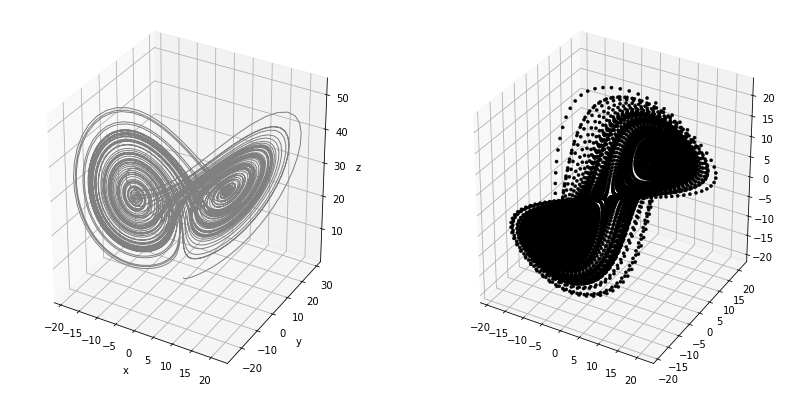

In [2]:
from mpl_toolkits.mplot3d import Axes3D

dt = 0.01
steps = 10000
sigma = 10
r = 28
b = 2.667
xs = np.empty(steps + 1)
ys = np.empty(steps + 1)
zs = np.empty(steps + 1)

# Set starting values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Calculate the partial derivatives at each t, then estimate t+1
for i in range(steps):
    x_d, y_d, z_d = lfn.Lorenz(xs[i], ys[i], zs[i], sigma, r, b)
    xs[i + 1] = xs[i] + (x_d * dt)
    ys[i + 1] = ys[i] + (y_d * dt)
    zs[i + 1] = zs[i] + (z_d * dt)
    
    
# perform LCE on lorenz
data_embed = lfn.takens_embed(3, 10, xs)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=1, c = 'grey')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax = fig.add_subplot(1, 2, 2, projection='3d')
data = data_embed
dotplot = ax.scatter3D(data[:,0], data[:,1],data[:,2], alpha = 1, linewidth = 0.4, color = 'k', s = 10)
plt.show()

In [ ]:
# Lorenz attractor over time
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import *
 
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
 

#duration of the video
duration = 1000
 
# matplot subplot
fig, ax = plt.subplots()
 
# method to get frames
def make_frame(t):
    t = np.int(t)
    fig = plt.figure(figsize=(40,20))
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    
    ax.plot(xs, ys, zs, lw=3, c = 'k', alpha = 1)


    ax.scatter3D(xs[t], ys[t], zs[t], alpha = 1,  color = 'coral', s = 150)
    
    ax.set_xlabel("y")
    ax.set_ylabel("y-t")
    ax.set_zlabel("y-2t") 
        
    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
   
animation.write_videofile(Ffig + 'Lorenz.mp4', fps = 1)
 

Tau = 15


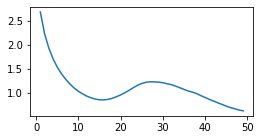

In [3]:
# Find tau - time delays that are maximally independent - how can we provide max information for each dimension?
#DO I NEED TO + 1???
from scipy.signal import argrelextrema

data = xs

MI_list = []
tau_range = 50
for i in range(1,tau_range):
    MI_list = np.append(MI_list,[lfn.MI(data,i,50)])
    
fig = plt.figure(figsize = (4,2))
plt.plot(range(1,tau_range), MI_list)

tau = argrelextrema(MI_list, np.less)[0][0] #find the first minima of MI function
print('Tau = ' + str(tau))

In [ ]:
# tau vs MI

# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np
 
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
 

#duration of the video
duration = 50
 
# matplot subplot
fig, ax = plt.subplots()
 
# method to get frames
def make_frame(t):
        
        
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(1, 2, 2)
    plt.plot(range(1,np.int(t+1)), MI_list[:np.int(t)], c = 'k', lw = 4)
    plt.xlim(0,tau_range)
    plt.ylim(np.min(MI_list), np.max(MI_list))
    if t >= 16:
        plt.vlines(x=16,  alpha = 1, ymin = np.min(MI_list), ymax = np.max(MI_list), color = 'red', linewidth = 3)
        
    plt.ylabel("Mutual information", size = 15)
    plt.xlabel("Tau", size = 15)

    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    data_embed = lfn.takens_embed(3, np.int(t+1), xs)
    data = data_embed
    ax.plot(data[:,0], data[:,1],data[:,2], lw = 2, color = 'grey')
    ax.set_xlabel("x", size = 10)
    ax.set_ylabel("x-t", size = 10)
    ax.set_zlabel("x-2t", size = 10)
    plt.show()
        
    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
animation.write_videofile(Ffig + 'Lorenz_tau.mp4', fps = 3)
 
# displaying animation with auto play and looping
animation.ipython_display(fps = 1, loop = False, autoplay = True)

In [ ]:
# CCM prediction vs number of library points


#duration of the video
duration = len(m_l)
 

# method to get frames
def make_frame(t):
    t = np.int(t) 
        
    fig = plt.figure(figsize=(28,14))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    dotplot = ax.scatter3D(m_l[t][:,0], m_l[t][:,1],m_l[t][:,2], alpha = 1, linewidth = 4, color = 'k', s = 0.6)
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_zlim(-20,20)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(corr_l[:t], lw = 6, c = 'coral') 
    ax.set_xlim(0, len(m_l))
    ax.set_ylim(0.96, 1.0)
        
    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
   
animation.write_videofile(Ffig + 'CCM_convergence.mp4', fps = 1)
 

In [ ]:
# lorenz embedding vs tau


# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np
 
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
 

#duration of the video
duration = 50
 
# matplot subplot
fig, ax = plt.subplots()
 
# method to get frames
def make_frame(t):
        
        
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(1, 2, 2)
    plt.plot(range(1,np.int(t+1)), MI_list[:np.int(t)], c = 'k', lw = 4)
    plt.xlim(0,tau_range)
    plt.ylim(np.min(MI_list), np.max(MI_list))
    if t >= 16:
        plt.vlines(x=16,  alpha = 1, ymin = np.min(MI_list), ymax = np.max(MI_list), color = 'red', linewidth = 3)
        
    plt.ylabel("Mutual information", size = 15)
    plt.xlabel("Tau", size = 15)

    
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    data_embed = lfn.takens_embed(3, np.int(t+1), xs)
    data = data_embed
    ax.plot(data[:,0], data[:,1],data[:,2], lw = 2, color = 'grey')
    ax.set_xlabel("x", size = 10)
    ax.set_ylabel("x-t", size = 10)
    ax.set_zlabel("x-2t", size = 10)
    plt.show()
        
    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
animation.write_videofile(Ffig + 'Lorenz_tau.mp4', fps = 3)
 
# displaying animation with auto play and looping
animation.ipython_display(fps = 1, loop = False, autoplay = True)

In [ ]:
# CCM animation


#duration of the video
duration = 1500
 
# matplot subplot
fig, ax = plt.subplots()
 
# method to get frames
def make_frame(t):
    t = np.int(t) 
    
    
    # Find nearest neighbours in library for current point in library
    current_point = lib_m[t]
    curr_dist = dist_mat[t]
    nn_ind = sorted(range(len(curr_dist)), key=lambda k: curr_dist[k])[:nn_num+1][1:] #return indeces 

    nn = lib_m[nn_ind] #positions of nearest neighbours in library, to current point in lib
    nn_pred = pred_m[nn_ind] #positions of points in pred, labelled by indeces of nearest neighbours in lib to point in lib

    #Reconstruct pred point
    #Use weights calculated from distances between lib point and its nearest neighbours in lib
    #Use coordinates of pred points sharing time indeces with lib nearest neighbours

    #CALCULATE WEIGHTS
    nn_dist = dist_mat[t, nn_ind]  #distances of each nn to our pred point
    w_mat = np.exp(-1*(nn_dist/np.min(nn_dist))) #matrix of weights for each nn 

    #SUM OVER ALL PRED POINTS
    x_ = pred_m[t][0] # Value I am trying to predict
    x_pred = 0 # Predicted value
    for nn_i in range(w_mat.shape[0]): #Loop through each nn in lib and sum over the weight*position in pred
        x_pred+= (w_mat[nn_i]/np.sum(w_mat))*nn_pred[nn_i]
    #x_pred = x_pred[0] #project back into 1d space
    
    fig = plt.figure(figsize=(40,20))
    
    
    if t < 201:
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        dotplot = ax.plot(lib_m[:,0], lib_m[:,1], lib_m[:,2], lw = 4, color = 'k')
        ax.scatter3D(lib_m[t][0], lib_m[t][1], lib_m[t][2], alpha = 1,  color = 'red', s = 400)
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        dotplot = ax.plot(pred_m[:,0], pred_m[:,1], pred_m[:,2], lw = 4, color = 'grey', alpha = 0.6)
        ax.scatter3D(pred_m[t][0], pred_m[t][1], pred_m[t][2], alpha = 1,  color = 'red', s = 400)
            
    if t >200 and t<401:
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        dotplot = ax.plot(lib_m[:,0], lib_m[:,1], lib_m[:,2], lw = 4, color = 'k')
        ax.scatter3D(lib_m[t][0], lib_m[t][1], lib_m[t][2], alpha = 1,  color = 'red', s = 400)
        ax.scatter3D(nn[:,0], nn[:,1], nn[:,2], alpha = 1,  color = 'green', s = 100)
        
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        dotplot = ax.plot(pred_m[:,0], pred_m[:,1], pred_m[:,2], lw = 4, color = 'grey', alpha = 0.6)
        ax.scatter3D(nn_pred[:,0], nn_pred[:,1], nn_pred[:,2], alpha = 1,  color = 'green', s = 100)
                
    if t> 400:
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        dotplot = ax.plot(lib_m[:,0], lib_m[:,1], lib_m[:,2], lw = 4, color = 'k')
        ax.scatter3D(lib_m[t][0], lib_m[t][1], lib_m[t][2], alpha = 1,  color = 'red', s = 400)
        ax.scatter3D(nn[:,0], nn[:,1], nn[:,2], alpha = 1,  color = 'green', s = 200)
        
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        dotplot = ax.plot(pred_m[:,0], pred_m[:,1], pred_m[:,2], lw = 4, color = 'grey', alpha = 0.6)
        
        ax.scatter3D(x_pred[0], x_pred[1], x_pred[2], alpha = 1,  color = 'red', s = 400)
        ax.scatter3D(nn_pred[:,0], nn_pred[:,1], nn_pred[:,2], alpha = 1,  color = 'green', s = 100)
        ax.plot(x_pred_m[400:t,0], x_pred_m[400:t,1], x_pred_m[400:t,2], lw = 4, color = 'coral')
                    
        
    # returning numpy image
    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)
   
animation.write_videofile(Ffig + 'CCM.mp4', fps = 1)
 